In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Lorenz attractor


$$\begin{alignedat}{0}
    \frac{dx}{dt} = \sigma (y - x)\\
    \\
    \frac{dy}{dt} = x (\rho - z) - y\\
    \\
    \frac{dz}{dt} = x y - \beta z
\end{alignedat}$$

Text(0.5,0,'Z Axis')

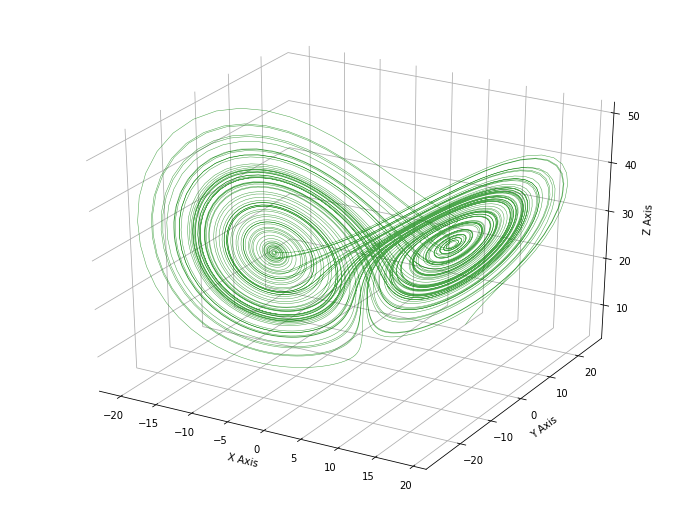

In [56]:
sigma = 10
rho = 28
beta = 8/3

h = 0.01
t = 10000

x = np.empty(t+1)
y = np.empty(t+1)
z = np.empty(t+1)

x[0]=10
y[0]=10
z[0]=10

for i in range(t):        
    x[i+1] = x[i] + h*(sigma*(y[i] - x[i]))
    y[i+1] = y[i] + h*(x[i]*(rho - z[i]) - y[i])
    z[i+1] = z[i] + h*(x[i]*y[i] - beta*z[i])


fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
# ax.view_init(30,90)

# plt.savefig('lorenz_attractor.png', dpi = 72, transparent = True, bbox_inches='tight', pad_inches=0.5)

In [45]:
def plot_lorenz(x, y, z, n):
    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca(projection='3d')
    ax.xaxis.set_pane_color((1,1,1,1))
    ax.yaxis.set_pane_color((1,1,1,1))
    ax.zaxis.set_pane_color((1,1,1,1))
    ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.5)
    ax.set_xlim((-30,30))
    ax.set_ylim((-30,30))
    ax.set_zlim((0,50))
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
#     ax.set_title('Lorenz system attractor')
    
    plt.savefig(f'test/{n:03d}.png', dpi=72, bbox_inches='tight', pad_inches=0.1)
    plt.close(fig)

step=20
for i in range(int(t/step)):
    plot_lorenz(x[0:i*step+step], y[0:i*step+step], z[0:i*step+step], i)

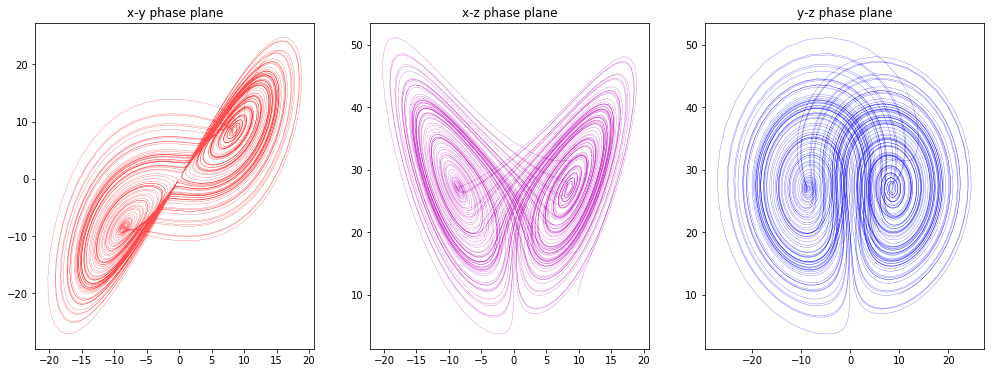

In [7]:
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 6))

# plot the x values vs the y values
ax[0].plot(x, y, color='r', alpha=0.7, linewidth=0.3)
ax[0].set_title('x-y phase plane')

# plot the x values vs the z values
ax[1].plot(x, z, color='m', alpha=0.7, linewidth=0.3)
ax[1].set_title('x-z phase plane')

# plot the y values vs the z values
ax[2].plot(y, z, color='b', alpha=0.7, linewidth=0.3)
ax[2].set_title('y-z phase plane')

# plt.savefig('lorenz_attractor_three.png', dpi = 72, transparent = True, bbox_inches='tight', pad_inches=0.5)

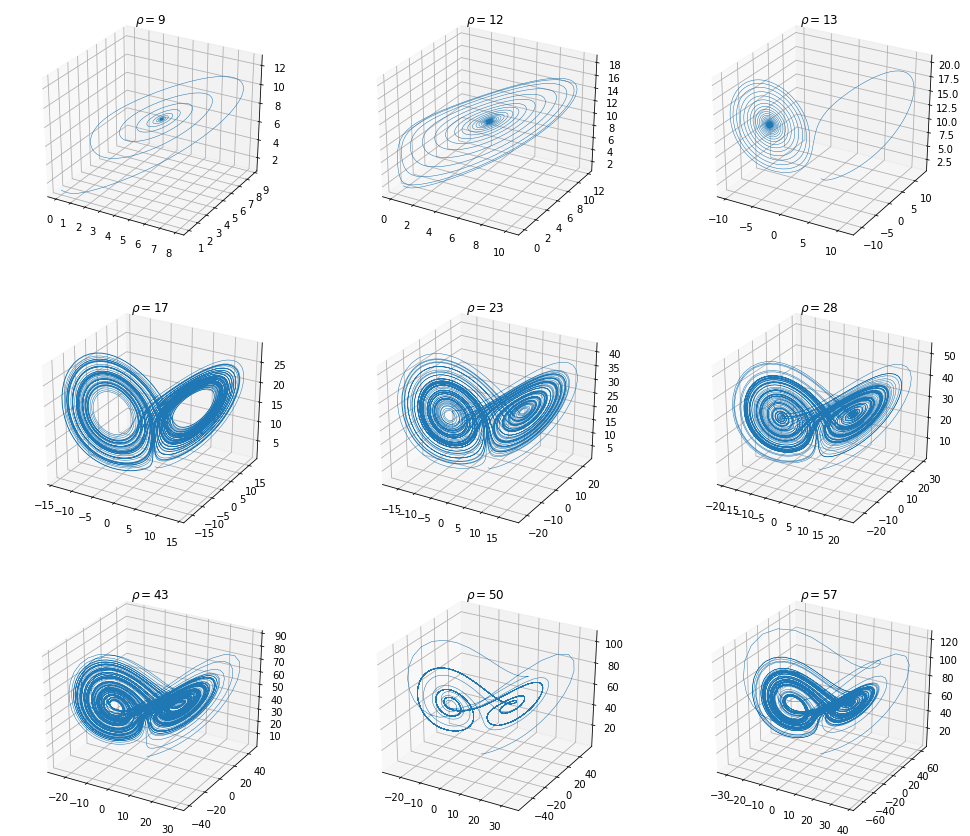

In [8]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

sigma = 10
rhos = [9, 12, 13, 17, 23, 28, 43, 50, 57]
beta = 8/3

dt = 0.01
num_steps = 10000

fig = plt.figure(figsize=(17, 15))

for irho, rho in enumerate(rhos):
    xs = np.empty(num_steps + 1)
    ys = np.empty(num_steps + 1)
    zs = np.empty(num_steps + 1)
    
    
    xs[0] = 0
    ys[0] = 1
    zs[0] = 1.05
    
    for i in range(num_steps):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i], s=10, r=rho, b=2.667)
        xs[i+1] = xs[i] + (x_dot * dt)
        ys[i+1] = ys[i] + (y_dot * dt)
        zs[i+1] = zs[i] + (z_dot * dt)


    ax=fig.add_subplot(f'33{irho+1}',projection='3d')
    ax.plot(xs, ys, zs, lw=0.5)
    ax.set_title(r"$\rho={}$".format(rho))
    
# plt.savefig('lorenz_attractor_many.png', dpi = 72, transparent = True, bbox_inches='tight', pad_inches=0.5)

Text(0.5,0.92,'Lorenz attractor phase diagram')

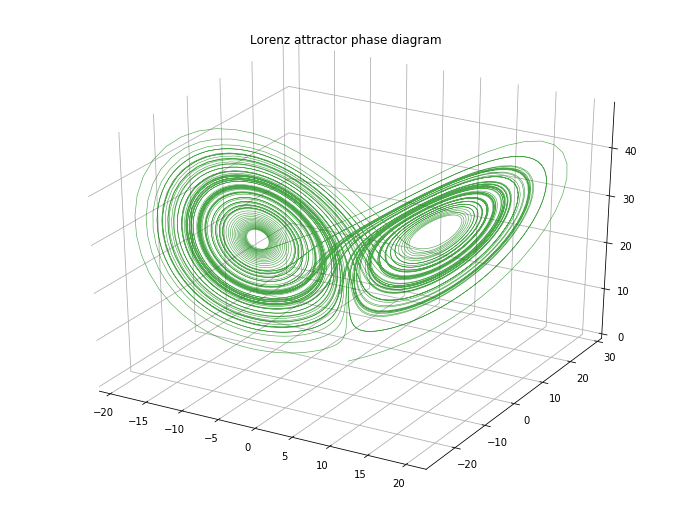

In [11]:
from scipy.integrate import odeint

initial_state = [0.1, 0, 0]

sigma = 10.
rho   = 28.
beta  = 8./3.

start_time = 0
end_time = 100
time_points = np.linspace(start_time, end_time, end_time*100)

def lorenz_system(current_state, t):
    x, y, z = current_state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

xyz = odeint(lorenz_system, initial_state, time_points)

x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.6)
ax.set_title('Lorenz attractor phase diagram')